In [18]:
import numpy as np
import matplotlib.pyplot as plt

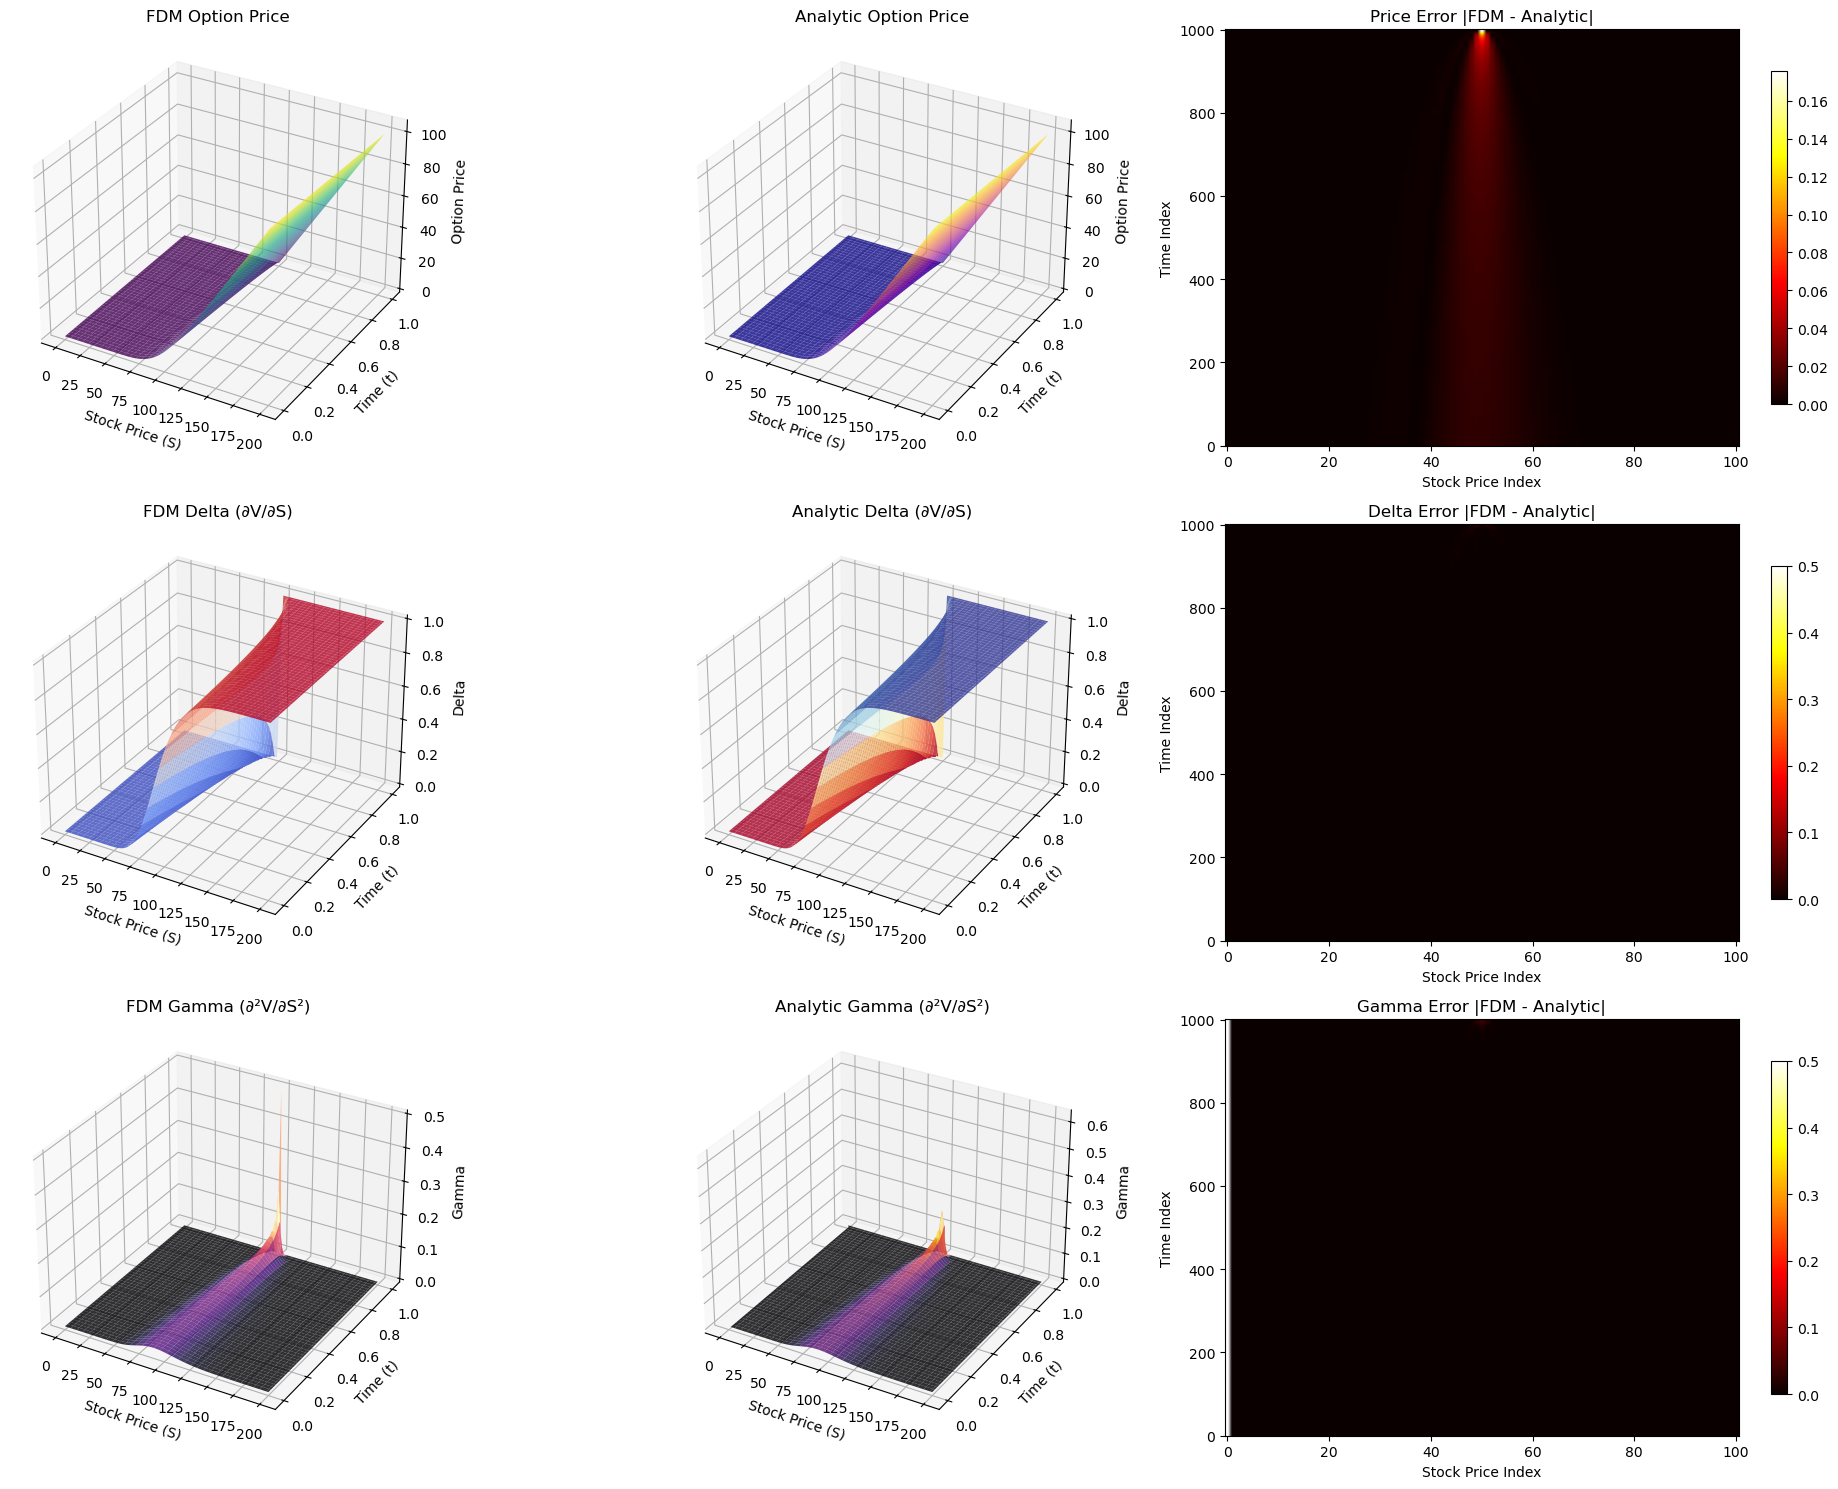

Error Analysis:
Option Price Errors:
  Max Absolute Error:  0.175803
  Mean Absolute Error: 0.001903
  RMSE:                0.005136

Delta Errors:
  Max Absolute Error:  0.500000
  Mean Absolute Error: 0.000129
  RMSE:                0.001638

Gamma Errors:
  Max Absolute Error:  nan
  Mean Absolute Error: nan
  RMSE:                nan



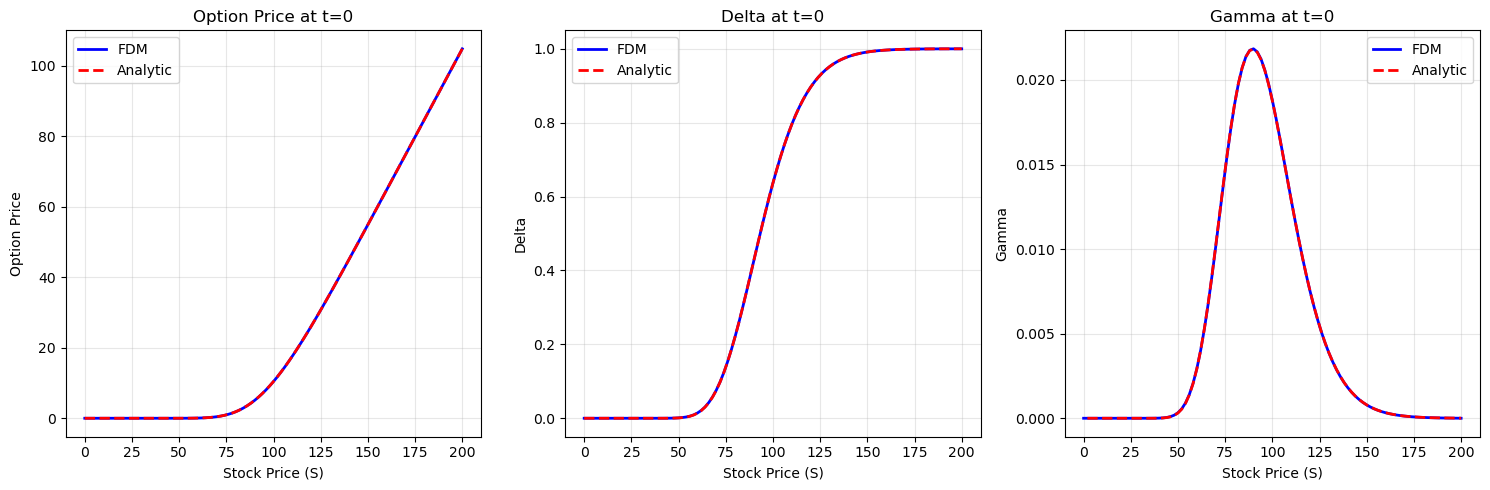

In [19]:
# Loading all CSV files
fd_price = np.loadtxt("../data/output_fd.csv", delimiter=",")      # Finite Difference Prices
bs_price = np.loadtxt("../data/output_analytic.csv", delimiter=",") # Analytic Prices
fd_delta = np.loadtxt("../data/delta_fd.csv", delimiter=",")       # Finite Difference Delta
bs_delta = np.loadtxt("../data/delta_analytic.csv", delimiter=",") # Analytic Delta
fd_gamma = np.loadtxt("../data/gamma_fd.csv", delimiter=",")       # Finite Difference Gamma
bs_gamma = np.loadtxt("../data/gamma_analytic.csv", delimiter=",") # Analytic Gamma

# Creating axes (should match OptionParams in C++ folder)
Nt, Nx = fd_price.shape[0] - 1, fd_price.shape[1] - 1
T, S_max = 1.0, 200
t = np.linspace(0, T, Nt + 1)            # time axis
S = np.linspace(0, S_max, Nx + 1)        # stock price axis

# Create meshgrid for 3D plots
T_mesh, S_mesh = np.meshgrid(t, S, indexing='ij')

# Set up the figure with subplots
fig = plt.figure(figsize=(20, 15))

# ---
# Option Prices
# ---

# 3D Surface Plots
ax1 = fig.add_subplot(3, 3, 1, projection='3d')
ax1.plot_surface(S_mesh, T_mesh, fd_price, cmap='viridis', alpha=0.8)
ax1.set_title("FDM Option Price")
ax1.set_xlabel("Stock Price (S)")
ax1.set_ylabel("Time (t)")
ax1.set_zlabel("Option Price")

ax2 = fig.add_subplot(3, 3, 2, projection='3d')
ax2.plot_surface(S_mesh, T_mesh, bs_price, cmap='plasma', alpha=0.8)
ax2.set_title("Analytic Option Price")
ax2.set_xlabel("Stock Price (S)")
ax2.set_ylabel("Time (t)")
ax2.set_zlabel("Option Price")

# Error Heatmap for Prices
ax3 = fig.add_subplot(3, 3, 3)
price_error = np.abs(fd_price - bs_price)
im1 = ax3.imshow(price_error, cmap="hot", aspect="auto", origin='lower')
ax3.set_title("Price Error |FDM - Analytic|")
ax3.set_xlabel("Stock Price Index")
ax3.set_ylabel("Time Index")
plt.colorbar(im1, ax=ax3, shrink=0.8)


# Delta (First Derivative)

ax4 = fig.add_subplot(3, 3, 4, projection='3d')
ax4.plot_surface(S_mesh, T_mesh, fd_delta, cmap='coolwarm', alpha=0.8)
ax4.set_title("FDM Delta (∂V/∂S)")
ax4.set_xlabel("Stock Price (S)")
ax4.set_ylabel("Time (t)")
ax4.set_zlabel("Delta")

ax5 = fig.add_subplot(3, 3, 5, projection='3d')
ax5.plot_surface(S_mesh, T_mesh, bs_delta, cmap='RdYlBu', alpha=0.8)
ax5.set_title("Analytic Delta (∂V/∂S)")
ax5.set_xlabel("Stock Price (S)")
ax5.set_ylabel("Time (t)")
ax5.set_zlabel("Delta")

# Error Heatmap for Delta
ax6 = fig.add_subplot(3, 3, 6)
delta_error = np.abs(fd_delta - bs_delta)
im2 = ax6.imshow(delta_error, cmap="hot", aspect="auto", origin='lower')
ax6.set_title("Delta Error |FDM - Analytic|")
ax6.set_xlabel("Stock Price Index")
ax6.set_ylabel("Time Index")
plt.colorbar(im2, ax=ax6, shrink=0.8)

# Gamma

ax7 = fig.add_subplot(3, 3, 7, projection='3d')
ax7.plot_surface(S_mesh, T_mesh, fd_gamma, cmap='magma', alpha=0.8)
ax7.set_title("FDM Gamma (∂²V/∂S²)")
ax7.set_xlabel("Stock Price (S)")
ax7.set_ylabel("Time (t)")
ax7.set_zlabel("Gamma")

ax8 = fig.add_subplot(3, 3, 8, projection='3d')
ax8.plot_surface(S_mesh, T_mesh, bs_gamma, cmap='inferno', alpha=0.8)
ax8.set_title("Analytic Gamma (∂²V/∂S²)")
ax8.set_xlabel("Stock Price (S)")
ax8.set_ylabel("Time (t)")
ax8.set_zlabel("Gamma")

# Error Heatmap for Gamma

ax9 = fig.add_subplot(3, 3, 9)
gamma_error = np.abs(fd_gamma - bs_gamma)
im3 = ax9.imshow(gamma_error, cmap="hot", aspect="auto", origin='lower')
ax9.set_title("Gamma Error |FDM - Analytic|")
ax9.set_xlabel("Stock Price Index")
ax9.set_ylabel("Time Index")
plt.colorbar(im3, ax=ax9, shrink=0.8)

plt.tight_layout()
plt.show()

# ---
# Stats
# ---

print("Error Analysis:")


# Price errors
price_max_error = np.max(price_error)
price_mean_error = np.mean(price_error)
price_rmse = np.sqrt(np.mean(price_error**2))

print(f"Option Price Errors:")
print(f"  Max Absolute Error:  {price_max_error:.6f}")
print(f"  Mean Absolute Error: {price_mean_error:.6f}")
print(f"  RMSE:                {price_rmse:.6f}")
print()

# Delta errors
delta_max_error = np.max(delta_error)
delta_mean_error = np.mean(delta_error)
delta_rmse = np.sqrt(np.mean(delta_error**2))

print(f"Delta Errors:")
print(f"  Max Absolute Error:  {delta_max_error:.6f}")
print(f"  Mean Absolute Error: {delta_mean_error:.6f}")
print(f"  RMSE:                {delta_rmse:.6f}")
print()

# Gamma errors
gamma_max_error = np.max(gamma_error)
gamma_mean_error = np.mean(gamma_error)
gamma_rmse = np.sqrt(np.mean(gamma_error**2))

print(f"Gamma Errors:")
print(f"  Max Absolute Error:  {gamma_max_error:.6f}")
print(f"  Mean Absolute Error: {gamma_mean_error:.6f}")
print(f"  RMSE:                {gamma_rmse:.6f}")
print()


# Additional analysis: Cross-sections at t=0 (present time)

fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Price comparison at t=0
ax1.plot(S, fd_price[0, :], 'b-', label='FDM', linewidth=2)
ax1.plot(S, bs_price[0, :], 'r--', label='Analytic', linewidth=2)
ax1.set_xlabel('Stock Price (S)')
ax1.set_ylabel('Option Price')
ax1.set_title('Option Price at t=0')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Delta comparison at t=0
ax2.plot(S, fd_delta[0, :], 'b-', label='FDM', linewidth=2)
ax2.plot(S, bs_delta[0, :], 'r--', label='Analytic', linewidth=2)
ax2.set_xlabel('Stock Price (S)')
ax2.set_ylabel('Delta')
ax2.set_title('Delta at t=0')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Gamma comparison at t=0
ax3.plot(S, fd_gamma[0, :], 'b-', label='FDM', linewidth=2)
ax3.plot(S, bs_gamma[0, :], 'r--', label='Analytic', linewidth=2)
ax3.set_xlabel('Stock Price (S)')
ax3.set_ylabel('Gamma')
ax3.set_title('Gamma at t=0')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

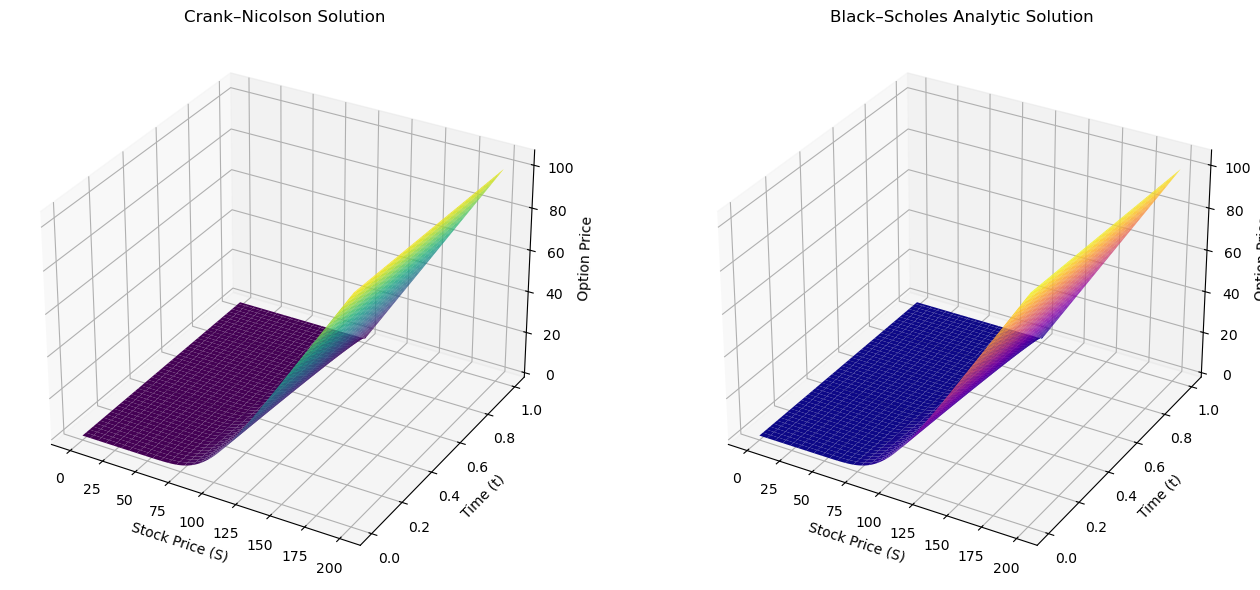

In [20]:


# Load CSVs (Finite difference (fd) and Analytic (bs) grids come from the c++ code in cpp_implementation)
fd = np.loadtxt("../data/output_fd.csv", delimiter=",") # Finite Difference
bs = np.loadtxt("../data/output_analytic.csv", delimiter=",") # Analytic Solution

# Create axes
Nt, Nx = fd.shape[0] - 1, fd.shape[1] - 1
T, S_max = 1.0, 200  # Should match OptionParams in C++

t = np.linspace(0, T, Nt + 1)            # time axis
S = np.linspace(0, S_max, Nx + 1)        # stock price axis

# Create meshgrid
T_mesh, S_mesh = np.meshgrid(t, S, indexing='ij')

# Plot both surfaces
fig = plt.figure(figsize=(14, 6))

# Plot Crank-Nicolson
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(S_mesh, T_mesh, fd, cmap='viridis')
ax1.set_title("Crank–Nicolson Solution")
ax1.set_xlabel("Stock Price (S)")
ax1.set_ylabel("Time (t)")
ax1.set_zlabel("Option Price")

# Plot Analytic
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(S_mesh, T_mesh, bs, cmap='plasma')
ax2.set_title("Black–Scholes Analytic Solution")
ax2.set_xlabel("Stock Price (S)")
ax2.set_ylabel("Time (t)")
ax2.set_zlabel("Option Price")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Absolute Error Between CN and Analytic')

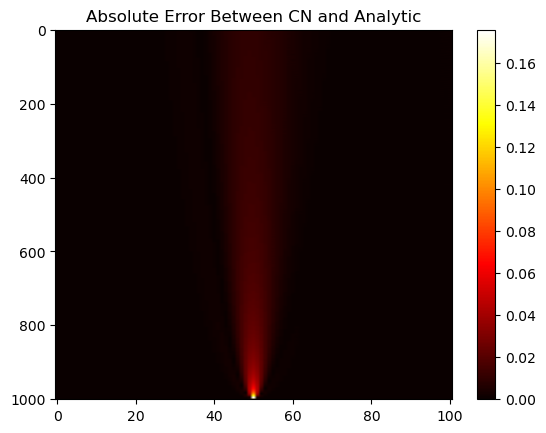

In [21]:
diff = fd - bs # Error measured as subtraction of corresponding gridpoints

plt.imshow(np.abs(diff), cmap="hot", aspect="auto")
plt.colorbar()
plt.title("Absolute Error Between CN and Analytic")